In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## **Correlation between GDP and S&P500**
In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

In [5]:
gdp = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/WorldBank_GDP.csv")
gdp = gdp[gdp['Country Code']=='USA']
sp500 = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/S&P500.csv")

In [15]:
# Use merge_ordered() to merge gdp and sp500 on year and date

"""
Use merge_ordered() to merge gdp and sp500 using a left join on year and date. Save the results as gdp_sp500.
"""
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', 
                             how='left')

# Print gdp_sp500
gdp_sp500

,Country Name,Country Code,Indicator Name,Year,GDP,Date,Returns
0,United States,USA,GDP (current US$),2010,1.499210e+13,2010.0,12.78
1,United States,USA,GDP (current US$),2011,1.554260e+13,2011.0,0.00
2,United States,USA,GDP (current US$),2012,1.619700e+13,2012.0,13.41
3,United States,USA,GDP (current US$),2012,1.619700e+13,2012.0,13.41
4,United States,USA,GDP (current US$),2013,1.678480e+13,2013.0,29.60
5,United States,USA,GDP (current US$),2014,1.752170e+13,2014.0,11.39
6,United States,USA,GDP (current US$),2015,1.821930e+13,2015.0,-0.73
7,United States,USA,GDP (current US$),2016,1.870720e+13,2016.0,9.54
8,United States,USA,GDP (current US$),2017,1.948540e+13,2017.0,19.42
9,United States,USA,GDP (current US$),2018,2.049410e+13,NaN,NaN


In [16]:
"""
Use merge_ordered(), again similar to before, to merge gdp and sp500 use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable gdp_sp500.
"""

# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', 
                             how='left',fill_method='ffill')


# Print gdp_sp500
gdp_sp500

,Country Name,Country Code,Indicator Name,Year,GDP,Date,Returns
0,United States,USA,GDP (current US$),2010,1.499210e+13,2010,12.78
1,United States,USA,GDP (current US$),2011,1.554260e+13,2011,0.00
2,United States,USA,GDP (current US$),2012,1.619700e+13,2012,13.41
3,United States,USA,GDP (current US$),2012,1.619700e+13,2012,13.41
4,United States,USA,GDP (current US$),2013,1.678480e+13,2013,29.60
5,United States,USA,GDP (current US$),2014,1.752170e+13,2014,11.39
6,United States,USA,GDP (current US$),2015,1.821930e+13,2015,-0.73
7,United States,USA,GDP (current US$),2016,1.870720e+13,2016,9.54
8,United States,USA,GDP (current US$),2017,1.948540e+13,2017,19.42
9,United States,USA,GDP (current US$),2018,2.049410e+13,2017,19.42


In [19]:
"""
Subset the gdp_sp500 table, select the gdp and returns columns, and save as gdp_returns.
"""
# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['GDP','Returns']]

# Print gdp_returns correlation
gdp_returns.corr()

,GDP,Returns
GDP,1.000000,0.212173
Returns,0.212173,1.000000


## **Phillips curve using merge_ordered()**
There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

In [25]:
unemployment = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/unemployment.csv",index_col=0)
inflation = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/inflation.csv",index_col=0)

In [33]:
unemployment.columns

Index(['date', 'unemployment_rate'], dtype='object')

         date      cpi     seriesid                  data_type  \
0  2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1  2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2  2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3  2015-06-01  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4  2016-01-01  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5  2016-06-01  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6  2017-01-01  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7  2017-06-01  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8  2018-01-01  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9  2018-06-01  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                6.1  
2                5.6  
3                5.3  
4                5.0  
5                4.9  
6                4.7  
7                4.3  
8                4.1  
9                4.0  


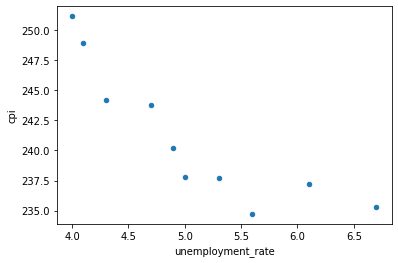

In [36]:
# Use merge_ordered() to merge inflation, unemployment with inner join
"""
Use merge_ordered() to merge the inflation and unemployment tables on date with an inner join, and save the results as inflation_unemploy.
"""
inflation_unemploy = pd.merge_ordered(inflation,unemployment,on ='date',how = 'inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy

"""
Using inflation_unemploy, create a scatter plot with unemployment_rate on the horizontal axis and cpi (inflation) on the vertical axis.
"""
inflation_unemploy.plot(kind ='scatter', x ='unemployment_rate',y='cpi')
plt.show()

## **merge_ordered() caution, multiple columns**
When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

In [37]:
gdp = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/WorldBank_GDP.csv")
pop = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/WorldBank_POP.csv")

In [43]:
"""
Use merge_ordered() on gdp and pop, merging on columns date and country with the fill feature, save to ctry_date.
"""

# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp,pop, on = ['Year','Country Name'],
                             fill_method='ffill')

# Print ctry_date
ctry_date

,Country Name,Country Code_x,Indicator Name_x,Year,GDP,Country Code_y,Indicator Name_y,Pop
0,Afghanistan,NaN,NaN,2010,NaN,AFG,"Population, total",2.918551e+07
1,Albania,NaN,NaN,2010,NaN,ALB,"Population, total",2.913021e+06
2,Algeria,NaN,NaN,2010,NaN,DZA,"Population, total",3.597746e+07
3,American Samoa,NaN,NaN,2010,NaN,ASM,"Population, total",5.607900e+04
4,Andorra,NaN,NaN,2010,NaN,AND,"Population, total",8.444900e+04
...,...,...,...,...,...,...,...,...
2643,West Bank and Gaza,USA,GDP (current US$),2018,2.049410e+13,PSE,"Population, total",4.569087e+06
2644,World,USA,GDP (current US$),2018,2.049410e+13,WLD,"Population, total",7.594270e+09
2645,"Yemen, Rep.",USA,GDP (current US$),2018,2.049410e+13,YEM,"Population, total",2.849869e+07
2646,Zambia,USA,GDP (current US$),2018,2.049410e+13,ZMB,"Population, total",1.735182e+07


In [44]:
"""
Perform the same merge of gdp and pop, but join on country and date (reverse of step 1) with the fill feature, saving this as date_ctry.
"""

# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp,pop, on = ['Country Name','Year'],
                             fill_method='ffill')

# Print date_ctry
date_ctry

,Country Name,Country Code_x,Indicator Name_x,Year,GDP,Country Code_y,Indicator Name_y,Pop
0,Afghanistan,NaN,NaN,2010,NaN,AFG,"Population, total",29185507.0
1,Afghanistan,NaN,NaN,2011,NaN,AFG,"Population, total",30117413.0
2,Afghanistan,NaN,NaN,2012,NaN,AFG,"Population, total",31161376.0
3,Afghanistan,NaN,NaN,2012,NaN,AFG,"Population, total",31161376.0
4,Afghanistan,NaN,NaN,2013,NaN,AFG,"Population, total",32269589.0
...,...,...,...,...,...,...,...,...
2643,Zimbabwe,USA,GDP (current US$),2014,2.049410e+13,ZWE,"Population, total",13586681.0
2644,Zimbabwe,USA,GDP (current US$),2015,2.049410e+13,ZWE,"Population, total",13814629.0
2645,Zimbabwe,USA,GDP (current US$),2016,2.049410e+13,ZWE,"Population, total",14030390.0
2646,Zimbabwe,USA,GDP (current US$),2017,2.049410e+13,ZWE,"Population, total",14236745.0


## **Using merge_asof() to study stocks**
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

In [55]:
jpm = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/jpm.csv",index_col=0)
wells = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/wells.csv",index_col=0)
bac = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/bac.csv",index_col=0)
jpm['date_time'] = pd.to_datetime(jpm['date_time'], format='%Y-%m-%d %H:%M:%S')
wells['date_time'] = pd.to_datetime(wells['date_time'], format='%Y-%m-%d %H:%M:%S')
bac['date_time'] = pd.to_datetime(bac['date_time'], format='%Y-%m-%d %H:%M:%S')

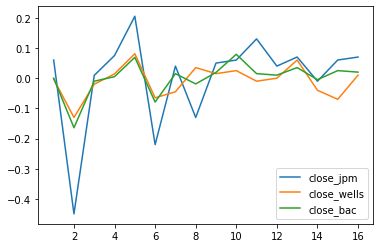

In [59]:
# Use merge_asof() to merge jpm and wells

"""
Use merge_asof() to merge jpm (left table) and wells together on the date_time column, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells.
"""
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', suffixes=('', '_wells'), direction='nearest')


# Use merge_asof() to merge jpm_wells and bac

"""
Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac.
"""
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on=['date_time'], suffixes=('_jpm', '_bac'), direction='nearest')


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

## **Using merge_asof() to create dataset**
The merge_asof() function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

In [76]:
gdp = pd.read_csv('/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/gdp_2.csv',index_col=0)
recession = pd.read_csv('/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/recession.csv',index_col=0)

gdp['date'] = pd.to_datetime(gdp['date'], format='%Y-%m-%d %H:%M:%S')
recession['date'] = pd.to_datetime(recession['date'], format='%Y-%m-%d %H:%M:%S')

**Instructions**

* Using merge_asof(), merge gdp and recession on date, with gdp as the left table. Save to the variable gdp_recession.
* Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.
* Using gdp_recession, plot a bar chart of gdp versus date, setting the color argument equal to is_recession.

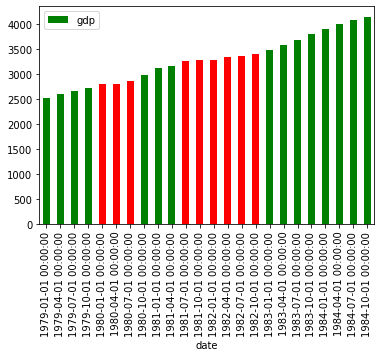

In [77]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

## **Subsetting rows with .query()**
In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.



In [94]:
gdp = pd.read_csv('/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/gdp_3.csv',index_col=0)
pop = pd.read_csv('/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/pop_3.csv',index_col=0)

gdp['date'] = pd.to_datetime(gdp['date'])
pop['date'] = pd.to_datetime(pop['date'])

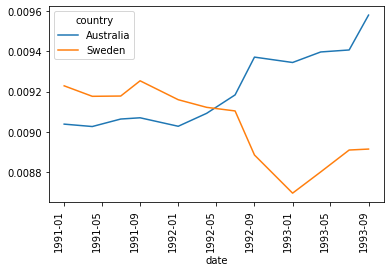

In [96]:
"""
Use merge_ordered() on gdp and pop on columns country and date with the fill feature, save to gdp_pop and print.
"""
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

"""
Add a column named gdp_per_capita to gdp_pop that divides gdp by pop.
"""

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']


"""
Pivot gdp_pop so values='gdp_per_capita', index='date', and columns='country', save as gdp_pivot
"""
# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')
# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date>="1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

## **Using .melt() to reshape government data**
The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using .melt(). You will need to add a date column to the table and sort by it to plot the data correctly.

In [101]:
ur_wide = pd.read_csv('/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/ur_wide.csv')
ur_wide['year'] = ur_wide['year'].astype(int)

In [109]:
import datetime

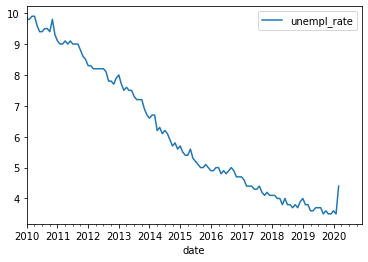

In [119]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month', value_name='unempl_rate')
# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'].astype(str) + '-' + ur_tall['month'].astype(str))

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values(by='date')

# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate')
plt.show()

## **Using .melt() for stocks vs bond performance**
It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.

Additionally, you will use the .query() method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

In [122]:
ten_yr = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/ten_yr.csv")
dji = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/dji.csv")

**Instructions**
* Use .melt() on ten_yr to unpivot everything except the metriccolumn, setting var_name='date' and value_name='close'. Save the result to bond_perc.
* Using the .query() method, select only those rows were metric equals ‘close’, and save to bond_perc_close.
* Use merge_ordered() to merge dji (left table) and bond_perc_closeon date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond.
* Using dow_bond, plot only the Dow and bond values.

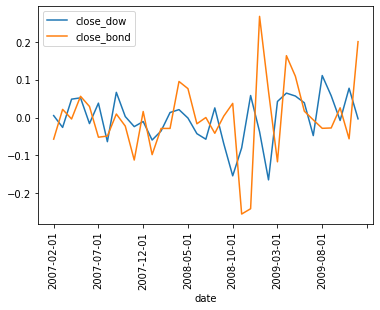

In [124]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars=['metric'], var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric=="close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=['_dow', '_bond'])


# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90)
plt.show()